In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# installation package kaggle
! pip install -q kaggle 

In [ ]:
# création d'un dossier kaggle
! mkdir ~/.kaggle/

You have to upload the json file on Kaggle to authorize google drive to take the data on Kaggle. To do this, you have to:
-go to kaggle
-in account
-generate a token that will be downloaded on the computer
-put the token on google colab
-after put the kaggle json file (token) in the kaggle folder

(source: https://www.youtube.com/watch?v=up8R4jT49Ak )

In [ ]:
# copier kaggle.json dans le dossier kaggle
! cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/

In [ ]:
# donner les droits à kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
! kaggle datasets download -d thoughtvector/customer-support-on-twitter

In [ ]:
! unzip /content/customer-support-on-twitter.zip -d customer_twitter_data

In [ ]:
!pip install emoji

     |████████████████████████████████| 170 kB 4.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=3b130e3046b19acdafb374e3401c9455d8adfc460a68111decf6682e59d3514b
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
!pip install demoji

     |████████████████████████████████| 42 kB 1.3 MB/s 


In [ ]:
!pip install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.5.4-py3-none-any.whl size=18688 sha256=3a143270f4631d523eabe69092b0235063e0b43a887d3f28c9a5be2d6a2d9c3c
  Stored in directory: /root/.cache/pip/wheels/71/de/ad/759faf4fea1e9b0fd935da28847aa3ca2eef14a888c2dc4952
Successfully built pandarallel


In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 4.2 MB/s 


In [ ]:
# import of different packages
import pandas as pd # dataframe manipulation
import re #for regular expressions
from bs4 import BeautifulSoup #to remove web characters
import emoji #to clean emojis
import demoji #to clean emojis
from tqdm.notebook import tqdm #progress bar
from sklearn.decomposition import PCA #PCA
from sklearn.cluster import KMeans #clustering methods
demoji.download_codes() #downloading emojis
import random # generate random numer
from sklearn.metrics.pairwise import cosine_similarity # calculate similarity between sentence
import numpy as np # matrice manipulation
import itertools # list manipulation
import os # systeme path


from pandarallel import pandarallel # parallelization of work
pandarallel.initialize(progress_bar = True)

from collections import Counter # count the different occurrences in the list
from wordcloud import WordCloud # generate wordcloud
import matplotlib.pyplot as plt # visualisation
%matplotlib inline
from PIL import Image # open image
from sklearn.feature_extraction.text import CountVectorizer #  Convert a collection of text documents to a matrix of token counts
from sklearn.decomposition import LatentDirichletAllocation # LDA

tqdm.pandas()

from gensim.parsing.preprocessing import remove_stopwords # drope stopwords
from string import punctuation # contains some puncutations
from scipy.cluster.hierarchy import ward, dendrogram # Perform Ward's linkage on a condensed distance matrix, Plot the hierarchical clustering as a dendrogram
from sklearn.feature_extraction.text import TfidfVectorizer # Convert a collection of raw documents to a matrix of TF-IDF features

import matplotlib as mpl # visualisation
from sklearn.manifold import MDS # Reshape dataframe in 2 dimensions

from nltk.tokenize import WhitespaceTokenizer # Tokenize a string on whitespace (space, tab, newline)
tk = WhitespaceTokenizer()

import xlrd # manipulation excel files
import nltk # The Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing
from nltk import word_tokenize # Return a tokenized copy of *text*
from nltk import pos_tag # Use NLTK's currently recommended part of speech tagger to tag the given list of tokens
nltk.download( 'averaged_perceptron_tagger')
nltk.download( 'tagsets')

from nltk.stem import WordNetLemmatizer # Lemmatize using WordNet's built-in morphy function
nltk.download('wordnet')
nltk.download('punkt')


lemmatizer = WordNetLemmatizer()

# Preprocessing

In [ ]:
def remove_weblinks(text):
    text = re.sub(r"((https?:\/\/)|(www\.))(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", " ", text)
    text = re.sub(r"/forum/\S+"," ", text)
    return text.strip()

def remove_mentions(text):
    text = re.sub("(\S+)?@\S+", ' ', text)
    text = re.sub(r"^.+@", " ", text)
    return text.strip()

def replace_empty(text):
    if text == '' or str(text) == 'nan':
        return "nan"
    if re.match("\s+$", text):
        return "nan"
    return text
    
def remove_two_char(text):
  for x in text.split():
    if len(x) <= 2:
      text = re.sub(r"\b{}\b".format(x), " ", text)
  return text.strip()


def remove_hashtags(text):
    text = re.sub('(#\w+)', '', text)
    return text.strip()

# Applying Beautiful Soup (bs4) package to remove web characters (html) + remove emojis
def souping(text):
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
    cln_text = BeautifulSoup(text, 'lxml').get_text() # remove web characters
    cln_text = demoji.replace(cln_text, " ")
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       "]+", flags=re.UNICODE)

    cln_noemo = emoji_pattern.sub(r' ', cln_text)
    regex = emoji.get_emoji_regexp()
    cln_post = regex.sub(" ", cln_noemo)
    return (cln_post)

path = '/content/drive/MyDrive/Big data et Marketing/Stopwords/'
files = os.listdir(path)
files
list_stw =[]
#  stopwords_file = "stopwords_en.txt"
for file in files:
  with open(path+file, "r") as fh:
      stopwords = [line.strip().lower() for line in fh.readlines()]
      for stw in stopwords:
        list_stw.append(stw)

def cleaning(text,stw = list_stw ):
  for word in stw:
      text = re.sub(r"\b{}\b".format(word), "", text)
  return text.strip()

def lem(text):
  word_tokens = nltk.word_tokenize(text)
  for token in word_tokens:
      # print('t',token)
      # print('l',lemmatizer.lemmatize(token))
      lem_word = lemmatizer.lemmatize(token)
      text = re.sub(r"\b{}\b".format(token), lem_word, text)
  return text.strip()  


punctuation += ":"+':'+"'"+"’"+"•"+'”'+"«"+"»"+"“"+"·"+"°"+"¿"

# Main function with preprocessing 
def preprocess(text):
    text = re.sub("\\u200b", "", text)
    text = re.sub("mmmmm", "", text)
    text = re.sub("\^", "", text)
    text = re.sub("\^", "", text)
    text = re.sub("https", "", text)
    text = re.sub("hey", "", text)
    text = re.sub("et", "", text)
    text = str(text)
    text = text.lower()
    text = remove_weblinks(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = souping(text)
    text = cleaning(text)
    text = re.sub("\s+"," ", text)
    text = re.sub("’", "'", text)
    text = re.sub("[“”·【】《》（）©£°¥«º»¿¤*~=%&€•@#…“”·、；!！？?,。〜‘¯【】《》（）©£°½¥«º»¿ðð¤_●–«» — — ´ ▽ ∀ ˊᗜ  ω  ▄ 〓█ ● ▂ █ ◥⊙ ▲ ⊙◤ ❶ ❷ ◍ ゜~ ← ▼ ω ♪ → ・｀ ღˇᴗˇ♡ ﾟ ]"," ",text)
    text = re.sub(r"["+punctuation+"]"," ",text)
    text = re.sub(r"\d+"," ",text)
    text = re.sub(r"(\bRT\b)"," ",text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub(r"(\brt\b)"," ",text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub(r"(\bretweet\b)"," ",text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub("[-\/\(\)\\\[\]\|]", " ", text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub(r"^\W+", " ", text)
    text = re.sub(r"(^\W+)?(^from: \w+ on \w+)?",'',text,flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub("\s+", " ", text)
    text = re.sub("⠀"," ", text)
    text = re.sub(r"^\W+", " ", text)
    text = re.sub(r"\s+"," ", text)
    text = re.sub("\s+", " ", text)
    text = re.sub('「', "", text)
    text = re.sub('」', "", text)
    text = remove_stopwords(text)
    text = lem(text)  
    text = remove_two_char(text) 
    text = replace_empty(text)
    return text.strip()

In [ ]:
# data loading
df = pd.read_csv(r'/content/drive/MyDrive/customer_twitter_data/twcs/twcs.csv') 
df

tweet_id   author_id  ...  response_tweet_id in_response_to_tweet_id
0               1  sprintcare  ...                  2                     3.0
1               2      115712  ...                NaN                     1.0
2               3      115712  ...                  1                     4.0
3               4  sprintcare  ...                  3                     5.0
4               5      115712  ...                  4                     6.0
...           ...         ...  ...                ...                     ...
2811769   2987947  sprintcare  ...                NaN               2987948.0
2811770   2987948      823869  ...            2987947                     NaN
2811771   2812240      121673  ...                NaN               2812239.0
2811772   2987949      AldiUK  ...                NaN               2987950.0
2811773   2987950      823870  ...    2987951,2987949                     NaN

[2811774 rows x 7 columns]

In [ ]:
df.dropna(subset=['text'], inplace=True)

In [ ]:
df.drop(df.index[15000:], axis=0, inplace=True)

In [ ]:
%time df['cleaned_text'] = df['text'].parallel_apply(preprocess)

In [ ]:
df

In [ ]:
df[df['cleaned_text'].isna()]

In [ ]:
df.drop(df.loc[df['cleaned_text'] == 'nan'].index, axis=0, inplace=True)

In [ ]:
df[df['cleaned_text'] == "nan"]['cleaned_text'].count()

In [ ]:
df['cleaned_text']

In [ ]:
df[df.cleaned_text.duplicated(keep=False) == True]

In [ ]:
df[df['cleaned_text'] == '']

In [ ]:
df.drop(df.loc[df['cleaned_text'] == ''].index, axis=0, inplace=True)

In [ ]:
df[df['cleaned_text'] == '']

In [ ]:
df

In [ ]:
df['duplicate'] = df.cleaned_text.duplicated(keep=False)

In [ ]:
df[df.duplicate == True]

In [ ]:
df['duplicate'].unique()

In [ ]:
df

In [ ]:
# we randomly retrieve the indexes of 1000 duplicated clauses and the indexes of 4000 non-duplicated clauses in order to constitute the database on which we will work
index_duplicate =  df[df.cleaned_text.duplicated(keep=False) == True].sample(n=1000, replace=False, random_state=1234).index
index_not_duplicate =  df[df.cleaned_text.duplicated(keep=False) == False].sample(n=4000, replace=False, random_state=1234).index
index_fusion = list(itertools.chain(index_duplicate, index_not_duplicate))
df_final = df.loc[index_fusion, :]

In [ ]:
df_final = df_final.reset_index()

In [ ]:
df_final

In [ ]:
# we save the database in excel format
writer = pd.ExcelWriter('data.xlsx', engine='xlsxwriter', options={'strings_to_urls': False})
df_final.to_excel(writer, index = False)
writer.save()
writer.close()

In [ ]:
# we copy the file on the drive to keep a copy 
!cp '/content/data.xlsx' '/content/drive/MyDrive'

In [ ]:
# # we load the excel file in dataframe that we use afterwards
# df_final = pd.read_excel('/content/drive/MyDrive/data.xlsx') 

In [ ]:
df_final[df_final['cleaned_text'].isna()]

In [ ]:
df_final[df_final['cleaned_text'] == '']

In [ ]:
df_final[df_final.duplicate == True]

In [ ]:
df_final[df_final.duplicate == False]

In [ ]:
# we add a column that gives us all the duplicates of a clause and another one that gives us their indexes
df_final['text_duplicated'] = None
df_final['list_index_duplicated'] = None
for i in df_final.index:
  if df_final.loc[i, 'duplicate'] == True:
    x = df_final.loc[i, 'cleaned_text']
    list_index_duplicated = []
    text_duplicated = []
    for j in range(i+1, len(df_final)-1):
      if df_final.loc[j, 'duplicate'] == True:
        y = df_final.loc[j, 'cleaned_text']
        if x in y and abs(len(x) - len(y)) <= 10:
          text_duplicated.append(y)
          list_index_duplicated.append(j)
    df_final['text_duplicated'][i] = text_duplicated
    df_final['list_index_duplicated'][i] = list_index_duplicated

In [ ]:
df_final

In [ ]:
texts = df_final['cleaned_text'].tolist()

In [ ]:
# returns each tokenizer word and the number of times it appears in the corpus
def get_frequencies(texts):
    all_tokens = []
    for doc in texts:
        all_tokens += tk.tokenize(doc)
    frequencies = Counter(all_tokens)
    return frequencies

In [ ]:
frequencies = get_frequencies(texts)

In [ ]:
frequencies

In [ ]:
# transforms the image matrix so that all white parts become black in order to create a mask for the word cloud. The words appear only in the non-black pixels
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# creation of the mask with the Twitter logo
mask = np.array(Image.open("/content/drive/MyDrive/Big data et Marketing/logo-twitter-2021.jpg"))
mask

# Transform your mask into a new one that will work with the function:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, transformed_mask[i]))

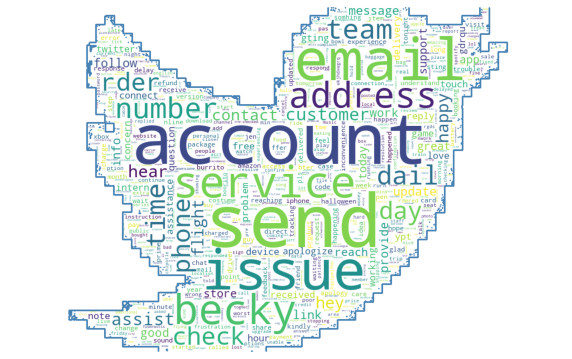

In [ ]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_color='steelblue', contour_width=3, mask = mask).generate_from_frequencies(frequencies)
wordcloud.to_file('WordCloud.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# BERT

In [ ]:
pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer ( 'bert-base-nli-mean-tokens' )

In [ ]:
%time text_embeddings = model.encode(df_final.cleaned_text.astype(str).tolist(), batch_size = 16, show_progress_bar = True )

In [ ]:
text_embeddings.shape

In [ ]:
text_embeddings

# Similarity

In [ ]:
similarities = cosine_similarity(text_embeddings)
print('pairwise dense output:\n {}\n'.format(similarities))

In [ ]:
similarities_sorted = similarities.argsort()
similarities_sorted.shape

In [ ]:
similarities_sorted[0].shape

In [ ]:
for i in range(15):
  print(similarities_sorted[i])

In [ ]:
similarities_sorted[3][-2]

In [ ]:
# Get list of similarity indices .
id_1 = []
id_2 = []
score = []
for index,array in enumerate(similarities_sorted):
    id_1.append(index)
    id_2.append(array[-2])
    score.append(similarities[index][array[-2]])
index_df = pd.DataFrame({'id_1' : id_1,
                          'id_2' : id_2,
                          'score' : score})

In [ ]:
index_df

In [ ]:
df_final['id_2'] = None
df_final['score'] = None
for index,array in enumerate(similarities_sorted):
    df_final['id_2'][index] = array[-2]
    df_final['score'][index] = similarities[index][array[-2]]

In [ ]:
df_final['duplicated_sim'] = df_final['score'] >= 0.90

In [ ]:
df_final

index  tweet_id       author_id  ...  id_2     score duplicated_sim
0     10498     14312    AppleSupport  ...   609         1           True
1      6210      9192    AppleSupport  ...   511         1           True
2      1552      2255  AskPlayStation  ...   744         1           True
3     12059     16091         AskAmex  ...   929  0.966972           True
4     14958     19337       AlaskaAir  ...   300         1           True
...     ...       ...             ...  ...   ...       ...            ...
4995   1416      2105          115714  ...   915  0.864679          False
4996   7431     10945    AzureSupport  ...  2925  0.862379          False
4997   8140     11754  ChipotleTweets  ...  3595  0.778979          False
4998   1367      1993          116151  ...  3819  0.842618          False
4999  10295     14099          118982  ...  3314  0.865808          False

[5000 rows x 15 columns]

# PCA

In [ ]:
pca = PCA(n_components = 85)

In [ ]:
text_pca = pca.fit(text_embeddings)

In [ ]:
text_pca.explained_variance_ratio_

In [ ]:
text_pca.explained_variance_ratio_.sum()

In [ ]:
text_embeddings_pca = pca.fit_transform(text_embeddings)

In [ ]:
text_embeddings_pca

In [ ]:
text_embeddings_pca.shape

# Clustering

In [ ]:
clustering = KMeans(n_clusters=10).fit(text_embeddings_pca.astype(float))

In [ ]:
df_final['Cluster'] = clustering.labels_

In [ ]:
clustering.labels_

In [ ]:
df_final

index  tweet_id       author_id  ...     score duplicated_sim Cluster
0     10498     14312    AppleSupport  ...         1           True       3
1      6210      9192    AppleSupport  ...         1           True       2
2      1552      2255  AskPlayStation  ...         1           True       3
3     12059     16091         AskAmex  ...  0.966972           True       2
4     14958     19337       AlaskaAir  ...         1           True       2
...     ...       ...             ...  ...       ...            ...     ...
4995   1416      2105          115714  ...  0.864679          False       2
4996   7431     10945    AzureSupport  ...  0.862379          False       3
4997   8140     11754  ChipotleTweets  ...  0.778979          False       8
4998   1367      1993          116151  ...  0.842618          False       2
4999  10295     14099          118982  ...  0.865808          False       4

[5000 rows x 16 columns]

In [ ]:
def cluster_names(x):
  if x == 0:
    x = 'Follow-up'
  elif x == 1:
    x = 'Party'
  elif x == 2:
    x = 'Duration'
  elif x == 3:
    x ='Reservation'
  elif x == 4:
    x = 'Communication'
  elif x == 5:
    x = 'Service'
  elif x == 6:
    x = 'Electronic device'
  elif x == 7:
    x = 'Balance'
  elif x == 8:
    x = 'Relationship'
  elif x == 9:
    x = 'Contact us'
  return x

In [ ]:
df_final['Cluster_name'] = df_final.Cluster.apply(lambda x: cluster_names(x))

In [ ]:
df_final

index  tweet_id       author_id  ...  duplicated_sim Cluster   Cluster_name
0     10498     14312    AppleSupport  ...            True       3    Reservation
1      6210      9192    AppleSupport  ...            True       2       Duration
2      1552      2255  AskPlayStation  ...            True       3    Reservation
3     12059     16091         AskAmex  ...            True       2       Duration
4     14958     19337       AlaskaAir  ...            True       2       Duration
...     ...       ...             ...  ...             ...     ...            ...
4995   1416      2105          115714  ...           False       2       Duration
4996   7431     10945    AzureSupport  ...           False       3    Reservation
4997   8140     11754  ChipotleTweets  ...           False       8   Relationship
4998   1367      1993          116151  ...           False       2       Duration
4999  10295     14099          118982  ...           False       4  Communication

[5000 rows x 17 columns]

In [ ]:
i = 0
names = [x for x in df_final.groupby(by='Cluster', sort = True)['Cluster_name'].unique()]
len_cluster = df_final.groupby(by='Cluster', sort = True)['Cluster'].value_counts()
for x in df_final.groupby(by='Cluster', sort = True)['cleaned_text'].apply(lambda x: ' '.join(x)):
  print('Top_topic_words cluster:',names[i][0])
  print('Number of clause:', len_cluster[i][i])
  print(Counter(x.split()).most_common(10))
  print()
  i +=1

Top_topic_words cluster: Follow-up
Number of clause: 511
[('service', 57), ('customer', 57), ('time', 32), ('flight', 31), ('phone', 29), ('day', 28), ('driver', 27), ('rder', 26), ('account', 23), ('amazon', 21)]

Top_topic_words cluster: Party
Number of clause: 164
[('becky', 163), ('stopping', 21), ('friend', 14), ('provide', 8), ('dail', 8), ('shout', 7), ('played', 7), ('sound', 7), ('good', 6), ('fam', 5)]

Top_topic_words cluster: Duration
Number of clause: 638
[('gdrqu', 26), ('ypt', 26), ('issue', 19), ('fusmrwstis', 17), ('talk', 16), ('send', 14), ('check', 13), ('replied', 13), ('update', 11), ('anwar', 10)]

Top_topic_words cluster: Reservation
Number of clause: 1057
[('send', 124), ('team', 90), ('issue', 89), ('dail', 67), ('number', 66), ('link', 63), ('account', 59), ('check', 57), ('assist', 56), ('rder', 49)]

Top_topic_words cluster: Communication
Number of clause: 608
[('phone', 80), ('account', 70), ('number', 63), ('iphone', 39), ('store', 36), ('app', 35), ('ser

In [ ]:
i = 0
for x in df_final.groupby(by='Cluster', sort = True)["cleaned_text"].apply(lambda x:[' '.join(x) ] ):
  print('words cluster:',i)
  plt.figure(figsize=(10,10))
  wordcloud = WordCloud(background_color="white", max_words=100, contour_color='steelblue', contour_width=3, mask=mask).generate_from_frequencies(get_frequencies(x))
  title_wordcloud = 'WordCloud_cluster' + str(i) + '.png'
  wordcloud.to_file(title_wordcloud)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  i +=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


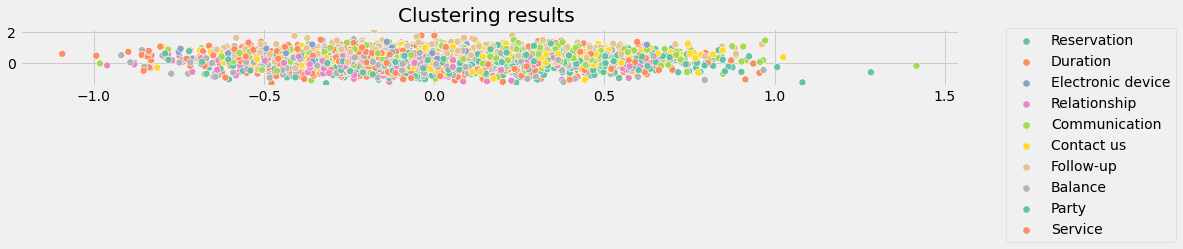

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


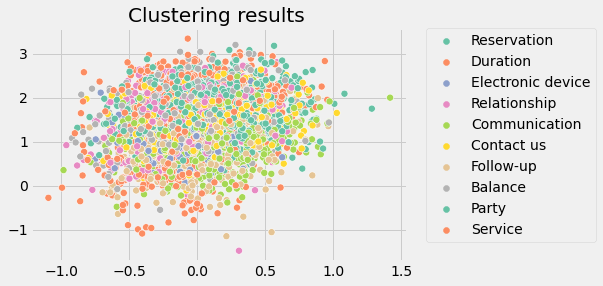

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


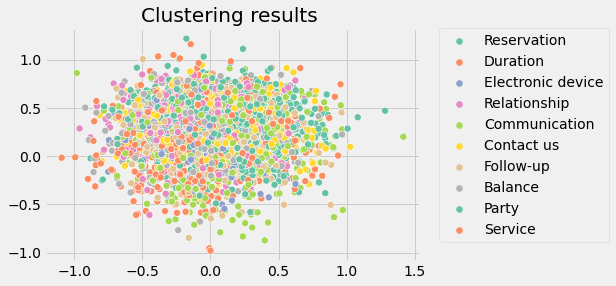

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


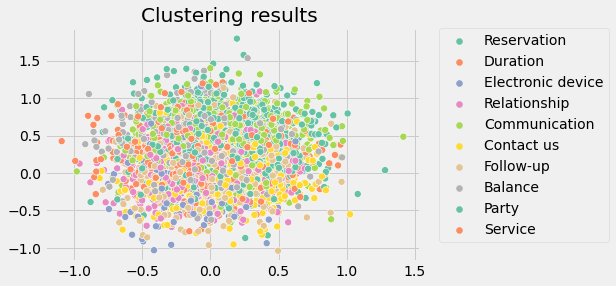

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


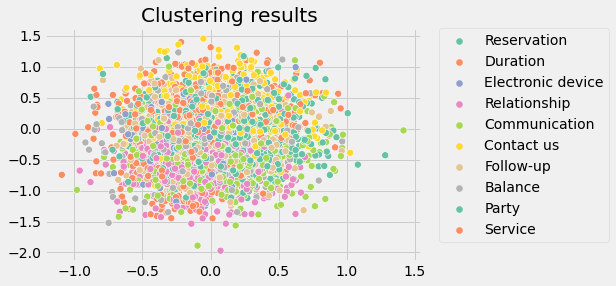

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


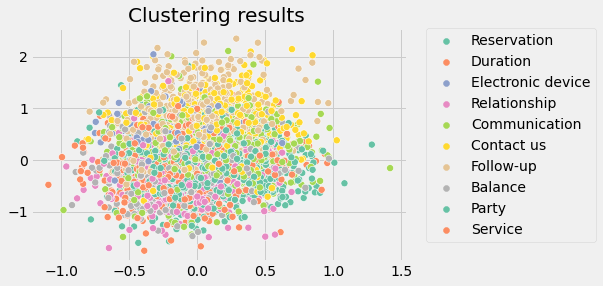

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


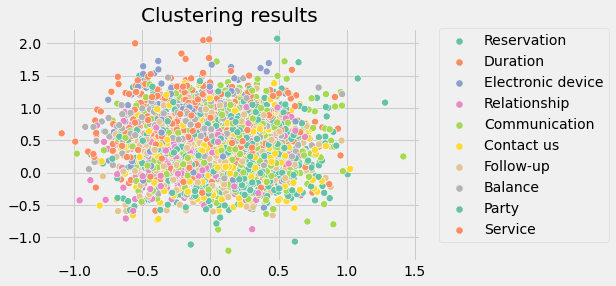

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


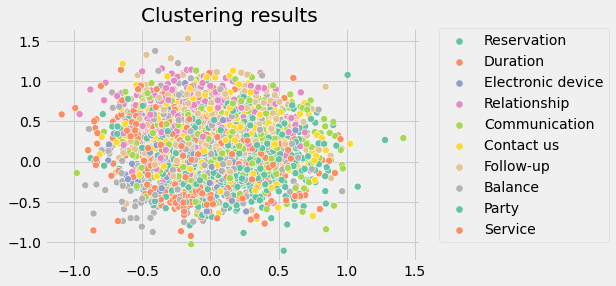

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


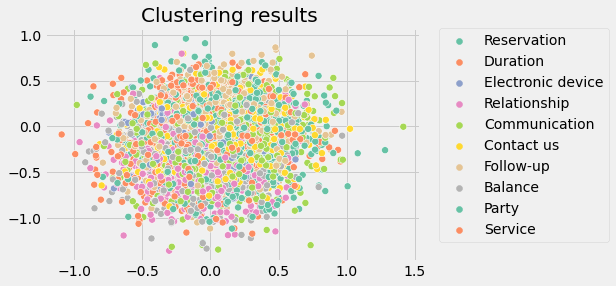

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


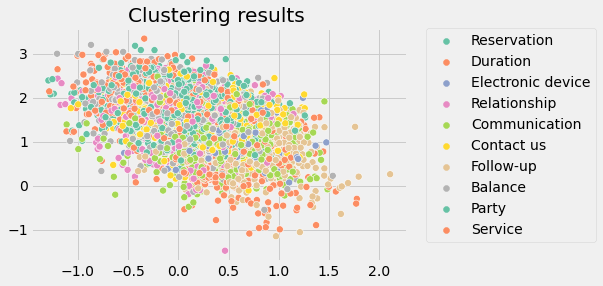

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


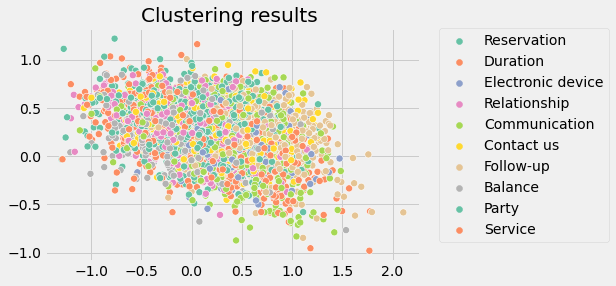

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


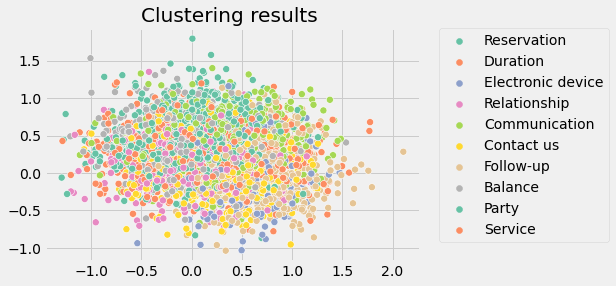

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


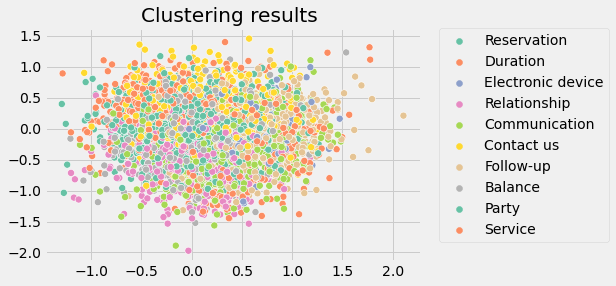

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


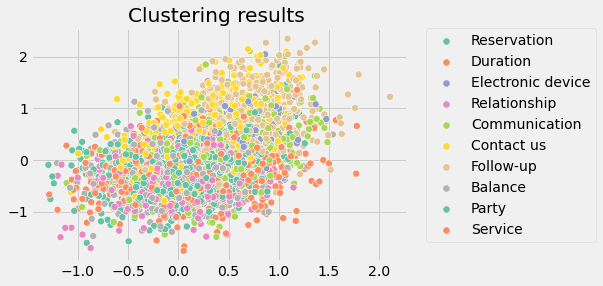

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


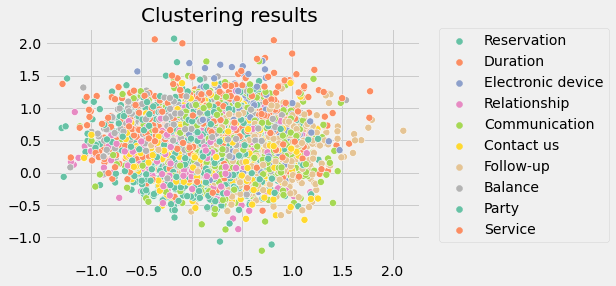

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


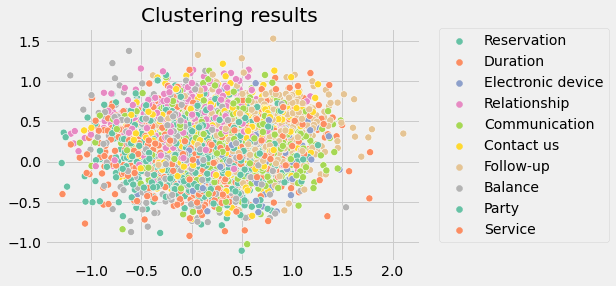

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


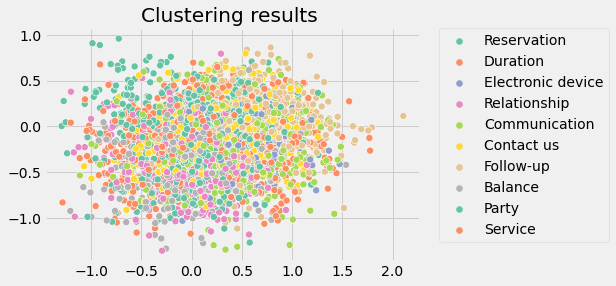

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


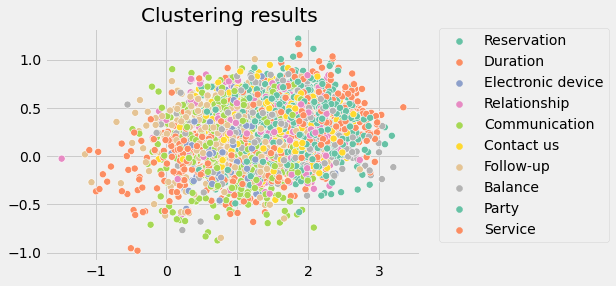

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


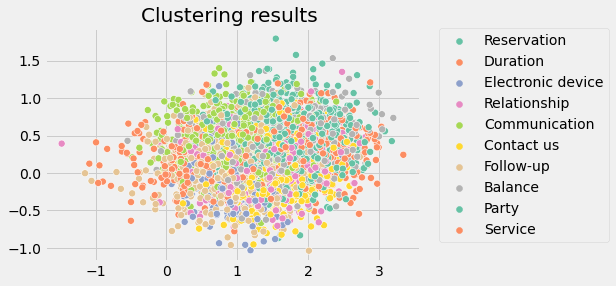

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


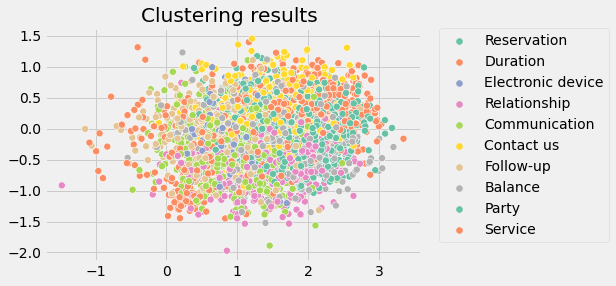

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


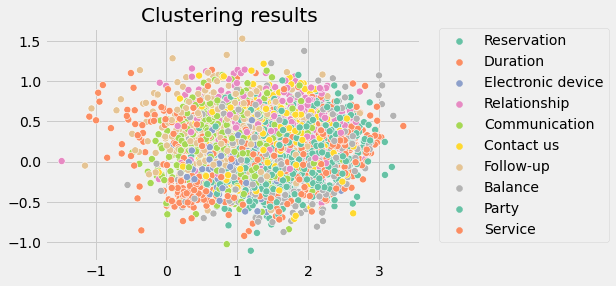

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


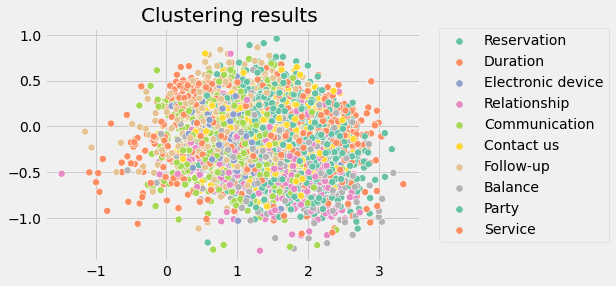

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


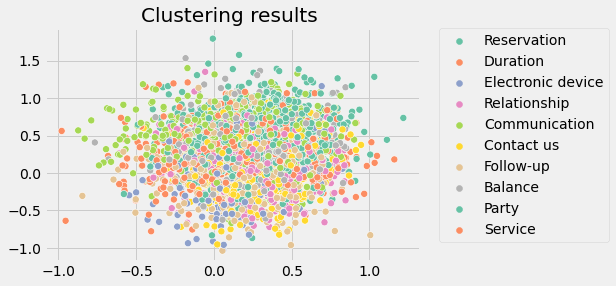

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


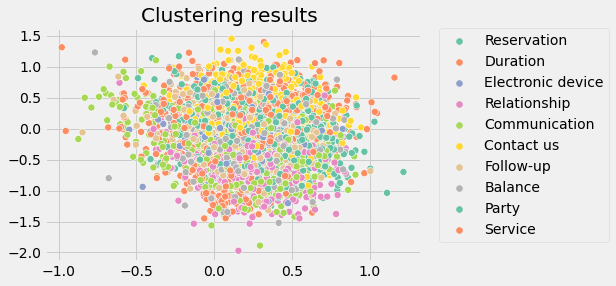

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


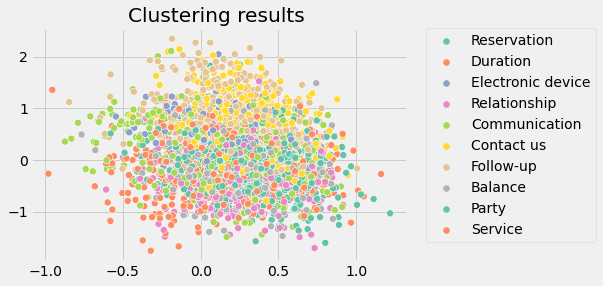

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


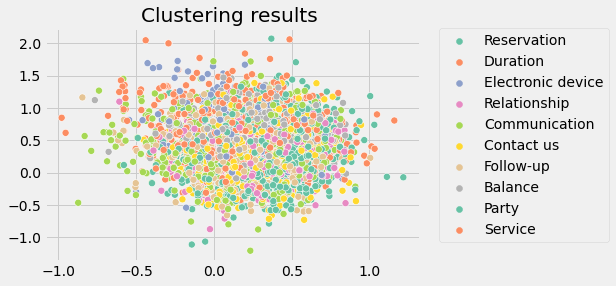

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


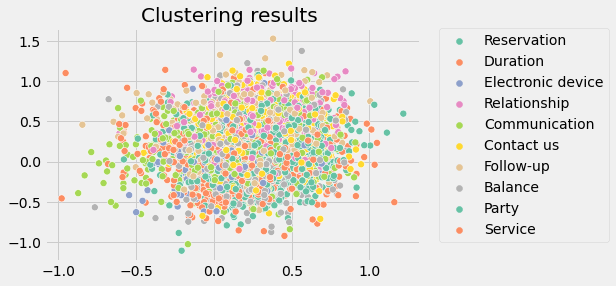

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


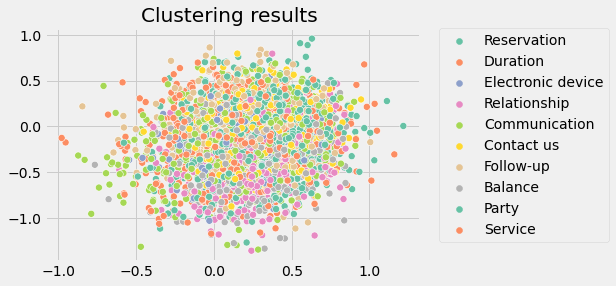

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


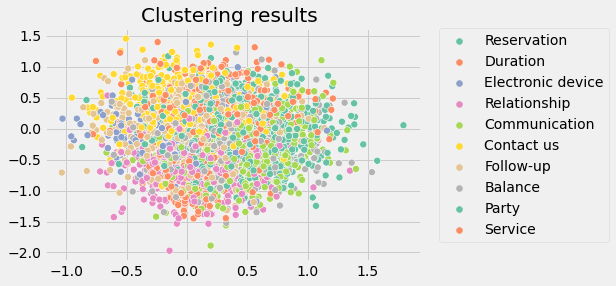

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


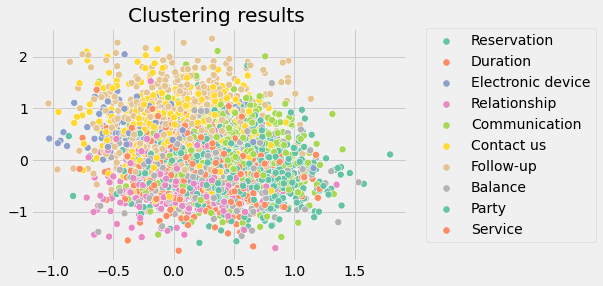

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


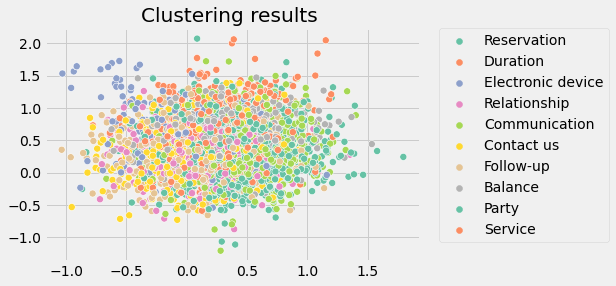

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


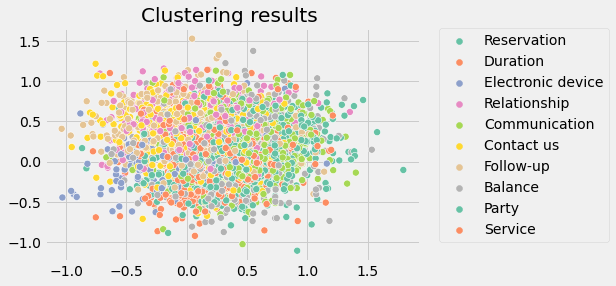

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


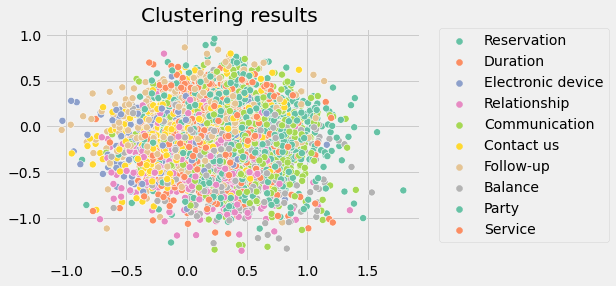

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


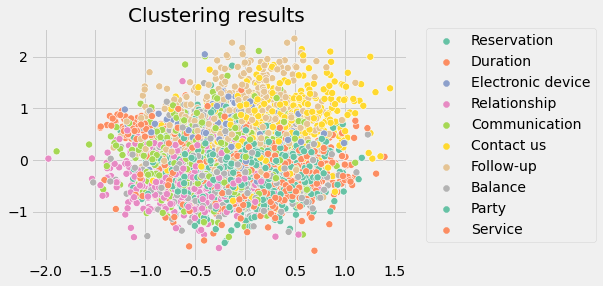

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


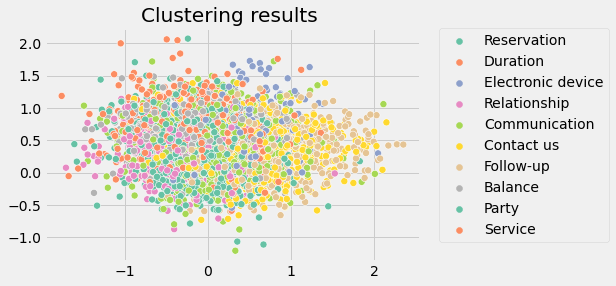

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


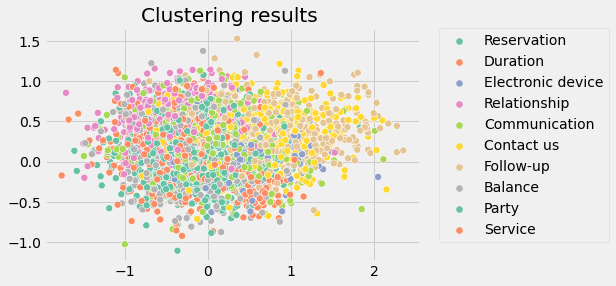

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


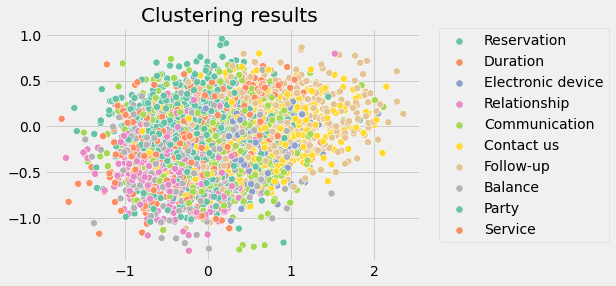

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


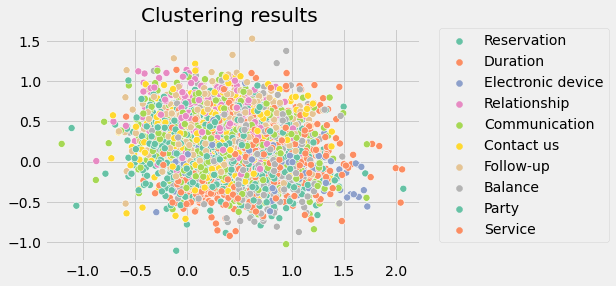

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


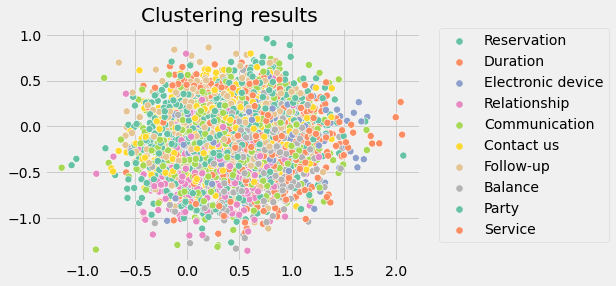

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


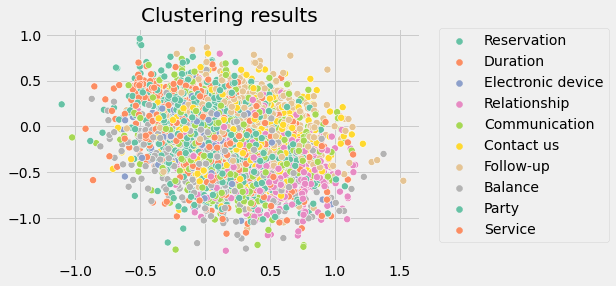

In [ ]:
import seaborn as sns

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 1))
for i in range(10):
  for j in range(i+1,10):
    scat = sns.scatterplot(
        text_embeddings[:,i],
        text_embeddings[:,j],
        s=50,
        data=df_final,
        hue=df_final.Cluster_name,
        #  style=df_final.Cluster_name,
        palette="Set2",
    )

    scat.set_title(
        "Clustering results "
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.savefig("Clustering.png", dpi=150)
    plt.show()

In [ ]:
mpl.colors.cnames

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#F0F8FF', 1: '#FFFAF0', 2: '#FFA500', 3: '#87CEFA', 4: '#C71585', 5: '#EEE8AA', 6: '#CD853F', 7: '#FFC0CB', 8: '#FF0000', 9: '#6A5ACD'}
# 0 Follow-up, 1 Party, 2 Duration, 3 Reservation, 4 Communication, 5 Service, 6 Electronic device, 7 Balance, 8 Relationship, 9 Contact us

#set up cluster names using a dict
cluster_names = {0: 'Follow-up', 
                 1: 'Party', 
                 2: 'Duration',
                 3: 'Reservation', 
                 4: 'Communication',
                 5: 'Service', 
                 6: 'Electronic device', 
                 7: 'Balance', 
                 8: 'Relationship', 
                 9: 'Contact us'
      }

In [ ]:
# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds2 = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

dist_similarities2 = cosine_similarity(text_embeddings)
pos2 = mds.fit_transform(dist_similarities2)  # shape (n_components, n_samples)

xs2, ys2 = pos2[:, 0], pos2[:, 1]

In [ ]:
clusters = df_final.Cluster.to_list()
titles = df_final.cleaned_text.to_list()
#create data frame that has the result of the MDS plus the cluster numbers and titles
dtes = pd.DataFrame(dict(x=xs2, y=ys2, label=clusters, title=titles)) 

#group by cluster
groups = dtes.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(20, 20)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
  # print('name', name)
  # print('group ', group )
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

# # #add label in x,y position with the label as the film title
# for i in range(len(dtes)):
#   # print(i)
#     ax.text(dtes.x[i], dtes.y[i], dtes.title[i], size=8)  

    
    
plt.show() 

# LDA

In [ ]:
count_vect = CountVectorizer()
term = count_vect.fit_transform(df_final['cleaned_text'].values.astype('U'))

In [ ]:
term

In [ ]:
LDA = LatentDirichletAllocation(n_components=10, random_state=1234)
LDA.fit(term)

In [ ]:
topic_values = LDA.transform(term)
topic_values.shape

In [ ]:
topic_values.max(axis=1)

In [ ]:
len(topic_values.max(axis=1))

In [ ]:
df_final['LDA_topic'] = topic_values.argmax(axis=1)

In [ ]:
df_final['LDA_topic_probabilities'] = topic_values.max(axis=1)

In [ ]:
df_final

In [ ]:
def lda_names(x):
  if x == 0:
    x = 'Delivery'
  elif x == 1:
    x = 'Distribution'
  elif x == 2:
    x = 'Order'
  elif x == 3:
    x ='Department'
  elif x == 4:
    x = 'Communication'
  elif x == 5:
    x = 'Help'
  elif x == 6:
    x = 'Follow-up'
  elif x == 7:
    x = 'Login'
  elif x == 8:
    x = 'After Sales'
  elif x == 9:
    x = 'Home'
  return x

In [ ]:
df_final['LDA_name'] = df_final.LDA_topic.apply(lambda x: lda_names(x))

In [ ]:
first_topic = LDA.components_[0]
first_topic

In [ ]:
top_ten_words = first_topic.argsort()[-10:]
top_ten_words

In [ ]:
for i in top_ten_words:
    print(count_vect.get_feature_names_out()[i])

In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:', df_final[df_final['LDA_topic'] == i]['LDA_name'].unique())
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]], )
    print('\n')
    # 0 Delivery, 1 Distribution, 2 Order, 3 Department, 4 Communication, 5 Help, 6 Follow-up, 7 Login, 8 After Sales, 9 Home

Top 10 words for topic #0: ['Delivery']
['happening', 'assist', 'happy', 'costume', 'dail', 'provide', 'becky', 'ypt', 'gdrqu', 'issue']


Top 10 words for topic #1: ['Distribution']
['rder', 'check', 'delivery', 'prime', 'instruction', 'day', 'xbox', 'support', 'twitter', 'message']


Top 10 words for topic #2: ['Order']
['concern', 'link', 'booking', 'time', 'love', 'flight', 'tracking', 'number', 'contact', 'update']


Top 10 words for topic #3: ['Department']
['game', 'tonight', 'rder', 'provide', 'public', 'personal', 'device', 'dail', 'version', 'work']


Top 10 words for topic #4: ['Communication']
['glad', 'intern', 'service', 'issue', 'email', 'apologize', 'day', 'phone', 'number', 'account']


Top 10 words for topic #5: ['Help']
['issue', 'work', 'problem', 'feel', 'code', 'error', 'free', 'guy', 'customer', 'service']


Top 10 words for topic #6: ['Follow-up']
['nline', 'delay', 'long', 'great', 'talk', 'info', 'time', 'rder', 'check', 'store']


Top 10 words for topic #7: [

In [ ]:
i = 0
for x in df_final.groupby(by='LDA_topic', sort = True)["cleaned_text"].apply(lambda x:[' '.join(x) ] ):
  print('LDA cluster:',i)
  plt.figure(figsize=(10,10))
  wordcloud = WordCloud(background_color="white", max_words=100, contour_color='steelblue', contour_width=3, mask=mask).generate_from_frequencies(get_frequencies(x))
  title_wordcloud = str(i) + '.png'
  wordcloud.to_file(title_wordcloud)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  i +=1

# Dendogram

In [ ]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, max_features=200000,
                                 min_df=0.00, use_idf=True)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(df_final.cleaned_text) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

In [ ]:
%time terms = tfidf_vectorizer.get_feature_names()

In [ ]:
terms

In [ ]:
len(terms)

In [ ]:
dist = 1 - cosine_similarity(tfidf_matrix)
dist

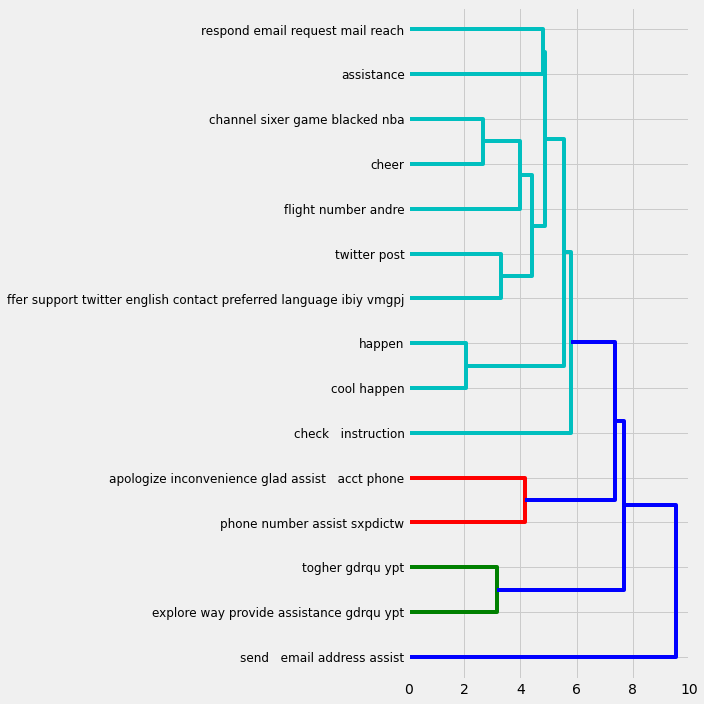

In [ ]:
linkage_matrix = ward(dist[:15]) #define the linkage_matrix using ward clustering pre-computed distances
titles = [title for title in df_final.cleaned_text[:15]]
fig, ax = plt.subplots(figsize=(10, 10)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);
# ax = dendrogram(linkage_matrix);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

# Bigram

In [ ]:
i = 0
for x in df_final.groupby(by='Cluster', sort = True)["cleaned_text"].apply(lambda x:[' '.join(x) ] ):
  #print(x)
  #x=x.to_list()
  # print('Top_topic_words cluster:',i)
  # # Using enumerate() and split() for Bigram formation
  output = [(k, m.split()[n + 1]) for m in x for n, k in enumerate(m.split()) if n < len(m.split()) - 1]
  print ("Bigram formation from given list:", names[i][0], "\n" + str(output))
  i +=1

#Bubble chart of POS tags

In [ ]:
pos_tag (texts)

In [ ]:
nltk.help.upenn_tagset('NN')

In [ ]:
%time pos = []
tag = []
for i in range(0,len(pos_tag (texts))):
  pos.append(pos_tag (texts)[i][0])
  tag.append(pos_tag (texts)[i][1])

In [ ]:
dff = pd.DataFrame ({'Sentence':pos, 'Type':tag, "cluster":df_final.Cluster.to_list()})
dff.head()

In [ ]:
writer = pd.ExcelWriter('pos_tag.xlsx', engine='xlsxwriter', options={'strings_to_urls': False})
dff.to_excel(writer, index = False)
writer.save()
writer.close()

In [ ]:
!cp '/content/pos_tag.xlsx' '/content/drive/MyDrive'